In [1]:
from importlib import reload
from src.Game import Game
from src.Players.Minesweeper_bot import Minesweeper_bot
from src.UI.GUI_Bot_Inputs import GUI_Bot_Inputs
from src.UI.No_UI import No_UI
from src.Grid import Grid
from src.UI.GUI_User_Inputs import GUI_User_Inputs

import matplotlib.pyplot as plt
import numpy as np

In [2]:
grid = Grid(10, 10, 0.18)
game = Game(grid)
game.action(5, 5)

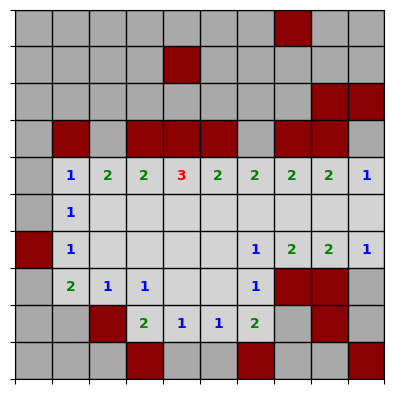

In [3]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from numpy import ndarray
from matplotlib.colors import ListedColormap


def view_grid(grid_values: ndarray, grid_view:ndarray|None=None, mines:ndarray|None=None, fig:Figure=None, ax:Axes=None):
    if grid_view is None:
        grid_view = np.ones_like(grid_values).astype(np.bool_)
    
    if mines is None:
        mines = np.zeros_like(grid_values).astype(np.bool_)

    if fig is None or ax is None:
        fig, ax = plt.subplots()

    cmap_values = ['lightgray', 'blue', 'green', 'red', 'darkblue', 'darkred', 'cyan', 'black', 'darkgrey', 'orange']
    for (j,i),label in np.ndenumerate(grid_values):
        if label != 0 and grid_view[j, i] and not mines[j, i]:
            ax.text(i,j,label,ha='center',va='center', color=cmap_values[label], fontweight='bold')
    
    # Grid
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    ax.set_xticks(np.arange(-0.5, grid_values.shape[1], 1), [])
    ax.set_yticks(np.arange(-0.5, grid_values.shape[0], 1), [])

    cmap_view = ListedColormap(['lightgray', 'darkgray', 'red', 'darkred'])
    plot_array = np.zeros_like(grid_values) + 1*(~grid_view) + 2*mines
    # plot_array = plot_array*(~mines) + mines*3
    ax.imshow(plot_array, cmap=cmap_view, vmin=0, vmax=3)

view_grid(grid.grid, game.player_grid_view, mines=grid.mines)

In [4]:
from models.Game_Tensor_Interface import Game_Tensor_Interface


tensor_representation = Game_Tensor_Interface().to_tensor(*game.visible_grid())

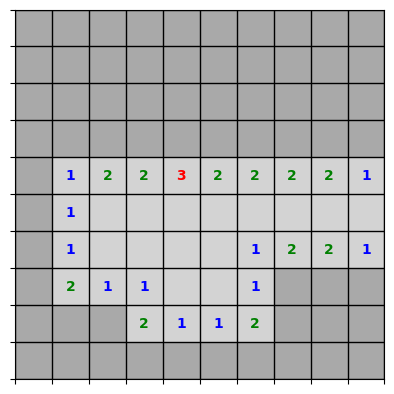

In [5]:
Game_Tensor_Interface.view_grid_tensor(tensor_representation)

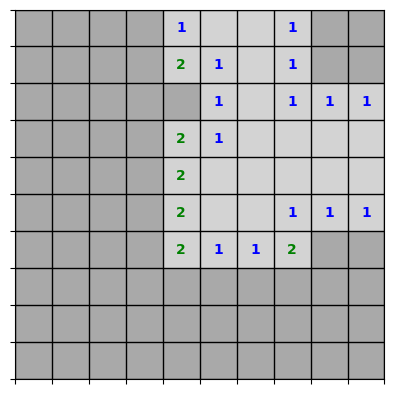

In [61]:
from torch import Tensor
import torch


def view_grid_tensor(tensor_representation: Tensor):
    grid_view = tensor_representation[9]
    grid_values = torch.sum(tensor_representation[:9] * torch.arange(9).view((9, 1, 1)), dim=0).type(torch.uint8)
    return np.array(grid_values), ~(np.array(grid_view).astype(np.bool_))

view_grid(*view_grid_tensor(tensor_representation))

tensor([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 2., 1., 1., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

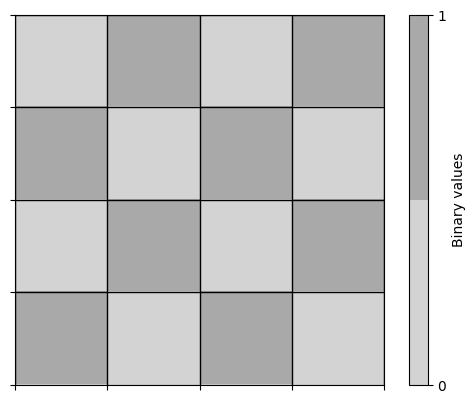

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Example 2D array
array = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

# Define the custom colormap
cmap = ListedColormap(['lightgray', 'darkgray'])

# Plot the array using plt.imshow with the custom colormap
plt.imshow(array, cmap=cmap)

# Add gridlines to separate the boxes
plt.grid(which='both', color='black', linestyle='-', linewidth=1)

# Customize the ticks to place the gridlines between the cells
plt.xticks(np.arange(-0.5, array.shape[1], 1), [])
plt.yticks(np.arange(-0.5, array.shape[0], 1), [])

# Turn on the grid with customized gridlines
plt.gca().set_xticks(np.arange(-0.5, array.shape[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, array.shape[0], 1), minor=True)
plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=1)
plt.gca().tick_params(which='minor', size=0)

# Optional: Add a colorbar with binary value labels
plt.colorbar(ticks=[0, 1], label='Binary values')

plt.show()
